In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import csv

In [ ]:
def load_data(biden_path, low_memory=False):
  biden_df= pd.read_csv(biden_path)
  return  biden_df

In [ ]:
def log_problematic_rows(file_path, expected_columns, encoding='utf-8'):
    problem_rows = []
    with open(file_path, mode='r', encoding=encoding, errors='ignore') as infile:
        reader = csv.reader(infile)
        for line_num, row in enumerate(reader, start=1):
            if len(row) != expected_columns:
                problem_rows.append((line_num, row))  # Log rows with issues
    return problem_rows

In [ ]:
def manually_fix_rows(problem_rows):
    fixed_rows = []
    for line_num, row in problem_rows:
        # Example fix: Remove extra columns or handle specific errors
        # Adjust this part based on the specific issues in your rows
        if len(row) > expected_columns:
            row = row[:expected_columns]  # Trim to expected column count
        fixed_rows.append((line_num, row))
    return fixed_rows

In [ ]:
def preprocess_csv(trump_path, temp_file_path, fixed_rows, encoding='utf-8'):
    with open(trump_path, mode='r', encoding=encoding, errors='ignore') as infile, \
         open(temp_file_path, mode='w', encoding=encoding, newline='') as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)
        fixed_row_dict = {line_num: row for line_num, row in fixed_rows}

        for line_num, row in enumerate(reader, start=1):
            if line_num in fixed_row_dict:
                fixed_row = fixed_row_dict[line_num]
                writer.writerow(fixed_row)
            else:
                writer.writerow(row)

In [ ]:
def load_data(file_path, expected_columns, encoding='utf-8'):
    temp_file_path = 'temp_file.csv'
    # Check for problematic rows
    problem_rows = log_problematic_rows(file_path, expected_columns, encoding)

    # Manually fix the problematic rows
    fixed_rows = manually_fix_rows(problem_rows)

    # Preprocess and fix the CSV
    preprocess_csv(file_path, temp_file_path, fixed_rows, encoding)

    try:
        # Load the cleaned file
        df = pd.read_csv(temp_file_path, low_memory=False, encoding=encoding)
        return df
    except pd.errors.ParserError as e:
        print(f"ParserError: {e}")
    except UnicodeDecodeError as e:
        print(f"UnicodeDecodeError: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

In [ ]:
expected_columns = 21  # Adjust this based on your CSV structure
biden_path= '/content/drive/MyDrive/hashtag_joebiden.csv'
biden_df = load_data(biden_path, expected_columns) # Load Biden data and pass expected_columns
trump_path = '/content/drive/MyDrive/hashtag_donaldtrump.csv'
trump_df = load_data(trump_path, expected_columns, encoding='latin-1') # Load Trump data and pass expected_columns

In [ ]:
def load_and_label_data(trump_path, biden_path, expected_columns):
    # Load each dataset
    trump_df = load_data(trump_path, expected_columns, encoding='latin-1')
    biden_df = load_data(biden_path, expected_columns, encoding='utf-8')

    # Add the Candidate column
    trump_df["Candidate"] = "TRUMP"
    biden_df["Candidate"] = "BIDEN"

    # Concatenate the datasets
    combined_df = pd.concat([trump_df, biden_df], ignore_index=True)

    return combined_df

In [ ]:
def sort_by_date(trump_biden_df, date_column='created_at'):
    # Ensure the date column is properly parsed as datetime
    trump_biden_df[date_column] = pd.to_datetime(trump_biden_df[date_column], errors='coerce')
    return trump_biden_df.sort_values(by=date_column, ignore_index=True)

In [ ]:
combined_df = load_and_label_data(trump_path, biden_path, expected_columns)
trump_biden_df = sort_by_date(combined_df)

In [ ]:
trump_biden_df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,Candidate
0,2020-10-15 00:00:01,1.316529221557252e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,360666534.0,El Sol Latino News,elsollatinonews,ð Noticias de interÃ©s para latinos de la c...,...,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,TRUMP
1,2020-10-15 00:00:01,1.316529221557252e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,360666534.0,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,BIDEN
2,2020-10-15 00:00:01,1.3165292227484303e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,331617619.0,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,TRUMP
3,2020-10-15 00:00:02,1.316529228091847e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8436472.0,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.5202471,-122.6741949,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,TRUMP
4,2020-10-15 00:00:02,1.316529227471237e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.28355589206057e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591,TRUMP


In [ ]:
trump_biden_df.isnull().sum()

,0
created_at,355
tweet_id,92
tweet,92
likes,201
retweet_count,332
source,1921
user_id,342
user_name,379
user_screen_name,332
user_description,183617


In [ ]:
trump_biden_df.shape

(1748160, 22)

In [ ]:
def convert_to_datetime(trump_biden_df, date_column='created_at', date_format=None, drop_invalid=True):
    try:
        # Count the initial number of invalid dates
        initial_invalid_dates = trump_biden_df[date_column].isna().sum()

        if date_format:
            trump_biden_df[date_column] = pd.to_datetime(trump_biden_df[date_column], format=date_format, errors='coerce')
        else:
            trump_biden_df[date_column] = pd.to_datetime(trump_biden_df[date_column], errors='coerce')

        # Count the number of invalid dates after conversion
        converted_invalid_dates = trump_biden_df[date_column].isna().sum()

        if drop_invalid:
            # Drop rows with NaT (invalid dates) in the date_column
            trump_biden_df = trump_biden_df.dropna(subset=[date_column])

        # Calculate and print the number of dropped rows
        dropped_invalid_dates = converted_invalid_dates - initial_invalid_dates
        print(f"Number of invalid dates dropped: {dropped_invalid_dates}")

    except ValueError as e:
        print(f"Error converting '{date_column}' to datetime: {e}")

    return trump_biden_df

In [ ]:
trump_biden_df = convert_to_datetime(trump_biden_df, date_format='%Y-%m-%d %H:%M:%S', drop_invalid=True)

Number of invalid dates dropped: 0


In [ ]:
def check_missing_location_correspondence(trump_biden_df):
    # Find rows where 'user_location' is missing
    missing_locations = trump_biden_df[trump_biden_df['user_location'].isnull()]

    # Check if all missing 'user_location' rows correspond to their missing 'lat' and 'long' rows
    if (missing_locations['lat'].isnull() & missing_locations['long'].isnull()).all():
        print("All the missing values in 'user_location' correspond to missing values in 'lat' and 'long'")
    else:
        # Count the number of rows where missing 'user_location' does not correspond to missing 'lat' and 'long'
        num_rows = (~(missing_locations['lat'].isnull() & missing_locations['long'].isnull())).sum()
        print(f"{num_rows} missing values in 'user_location' do not correspond to missing values in 'lat' and 'long'")

In [ ]:
check_missing_location_correspondence(trump_biden_df)

All the missing values in 'user_location' correspond to missing values in 'lat' and 'long'


In [ ]:
# Function to prioritize and remove duplicates
def prioritize_and_remove_duplicates(trump_biden_df):
    # Define the columns to consider for completeness
    completeness_criteria = [
        'tweet', 'user_location', 'likes', 'retweet_count', 'user_id',
        'user_name', 'user_followers_count'
    ]

    # Keep a count of initial duplicates based on 'tweet_id'
    initial_duplicates = trump_biden_df.duplicated(subset='tweet_id').sum()

    # Add a 'missing_count' column to count missing values in completeness criteria
    trump_biden_df['missing_count'] = trump_biden_df[completeness_criteria].isnull().sum(axis=1)

    # Sort the DataFrame by 'tweet_id' and 'missing_count'
    # This ensures that rows with fewer missing values come first for each 'tweet_id'
    trump_biden_df = trump_biden_df.sort_values(by=['tweet_id', 'missing_count'])

    # Drop the 'missing_count' column as it's no longer needed
    trump_biden_df = trump_biden_df.drop(columns='missing_count')

    # Drop duplicates, keeping the first occurrence (the one with the fewest missing values)
    trump_biden_df = trump_biden_df.drop_duplicates(subset='tweet_id', keep='first')

    # Count the number of duplicates removed
    final_duplicates = trump_biden_df.duplicated(subset='tweet_id').sum()
    duplicates_removed = initial_duplicates - final_duplicates

    print(f"Number of duplicates removed: {duplicates_removed}")

    return trump_biden_df

In [ ]:
# Call the function
trump_biden_df = prioritize_and_remove_duplicates(trump_biden_df)

Number of duplicates removed: 224896


In [ ]:
trump_biden_df.tail()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,Candidate
1747800,2020-11-08 23:59:54,1.3255888929054024e+18,"@sammelbis1998 @iheartmindy @bnorthg First, yo...",0.0,0.0,Twitter for iPad,768781141.0,Debra,drdeblk,MD. Autism specialist. Film lover. #DumpTrump2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 17:47:56.012674,TRUMP
1747801,2020-11-08 23:59:55,1.3255888944825344e+18,OK just had to do it !\n#Trump #CatapultTrump ...,105.0,28.0,Twitter Web App,451979107.0,Dunken K Bliths,DunkenKBliths,"""Tesla owner's will be followed back""\n\n#Mach...",...,â Official Twitter Account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 17:47:55.807500,TRUMP
1747802,2020-11-08 23:59:56,1.3255888982994534e+18,@nbcbayarea Who doesnât like dogs or any kin...,1.0,1.0,Twitter for iPhone,118263866.0,Dianna Maria,DiannaMaria,"~ I am a very proud mom of a sweet, kind and c...",...,United States,39.7837304,-100.4458825,NaN,United States,North America,NaN,NaN,2020-11-09 17:46:06.939099,TRUMP
1747803,2020-11-08 23:59:57,1.3255889020323226e+18,#JoeBiden 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂 https://t.co/Ym...,0.0,0.0,Twitter for iPhone,114847946.0,Nataša,PewPeeew,My brain consists of coping mechanisms and vin...,...,Deutschland,51.0834196,10.4234469,NaN,Germany,Europe,NaN,NaN,2020-11-09 18:26:04.550843,BIDEN
1747804,2020-11-08 23:59:58,1.3255889087264236e+18,"Ik moet zeggen dat ik #Biden ""the lesser of tw...",0.0,0.0,Twitter for Android,586386345.0,Job,_JobO__,-voeg hier uw interessante bio toe-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 18:32:45.747707,BIDEN


In [ ]:
def drop_irrelevant_columns(trump_biden_df):
    # Define the columns to keep
    columns_to_keep = [
        'created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count',
        'user_id', 'user_name', 'user_join_date', 'user_followers_count',
        'user_location', 'Candidate'
    ]

    # Drop irrelevant columns
    trump_biden_df = trump_biden_df[columns_to_keep]

    return trump_biden_df

In [ ]:
trump_biden_df = drop_irrelevant_columns(trump_biden_df)

In [ ]:
trump_biden_df.tail()

,created_at,tweet_id,tweet,likes,retweet_count,user_id,user_name,user_join_date,user_followers_count,user_location,Candidate
1747800,2020-11-08 23:59:54,1.3255888929054024e+18,"@sammelbis1998 @iheartmindy @bnorthg First, yo...",0.0,0.0,768781141.0,Debra,2012-08-20 03:53:11,1079.0,NaN,TRUMP
1747801,2020-11-08 23:59:55,1.3255888944825344e+18,OK just had to do it !\n#Trump #CatapultTrump ...,105.0,28.0,451979107.0,Dunken K Bliths,2012-01-01 08:04:29,12192.0,â Official Twitter Account,TRUMP
1747802,2020-11-08 23:59:56,1.3255888982994534e+18,@nbcbayarea Who doesnât like dogs or any kin...,1.0,1.0,118263866.0,Dianna Maria,2010-02-28 03:31:22,1462.0,United States,TRUMP
1747803,2020-11-08 23:59:57,1.3255889020323226e+18,#JoeBiden 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂 https://t.co/Ym...,0.0,0.0,114847946.0,Nataša,2010-02-16 20:10:35,33.0,Deutschland,BIDEN
1747804,2020-11-08 23:59:58,1.3255889087264236e+18,"Ik moet zeggen dat ik #Biden ""the lesser of tw...",0.0,0.0,586386345.0,Job,2012-05-21 06:30:14,119.0,NaN,BIDEN


In [ ]:
trump_biden_df.isnull().sum()

,0
created_at,0
tweet_id,0
tweet,0
likes,8
retweet_count,8
user_id,8
user_name,51
user_join_date,249
user_followers_count,249
user_location,462917


In [ ]:
def impute_missing_values(trump_biden_df):
    # Calculate median values for specified columns
    median_likes = trump_biden_df['likes'].median()
    median_retweet_count = trump_biden_df['retweet_count'].median()
    median_user_followers_count = trump_biden_df['user_followers_count'].median()

    # Impute missing values with medians
    trump_biden_df['likes'].fillna(median_likes, inplace=True)
    trump_biden_df['retweet_count'].fillna(median_retweet_count, inplace=True)
    trump_biden_df['user_followers_count'].fillna(median_user_followers_count, inplace=True)

    return trump_biden_df

In [ ]:
trump_biden_df = impute_missing_values(trump_biden_df)

In [ ]:
trump_biden_df.isnull().sum()

,0
created_at,0
tweet_id,0
tweet,0
likes,0
retweet_count,0
user_id,8
user_name,51
user_join_date,249
user_followers_count,0
user_location,462917


In [ ]:
def convert_to_datetime(trump_biden_df, date_column='user_join_date', date_format=None, drop_invalid=True):
    try:
        # Count the initial number of rows
        initial_row_count = len(trump_biden_df)

        # Convert the date column to datetime
        if date_format:
            trump_biden_df[date_column] = pd.to_datetime(trump_biden_df[date_column], format=date_format, errors='coerce')
        else:
            trump_biden_df[date_column] = pd.to_datetime(trump_biden_df[date_column], errors='coerce')

        # Count the number of rows with invalid dates after conversion
        invalid_dates_after_conversion = trump_biden_df[date_column].isna().sum()

        if drop_invalid:
            # Drop rows with NaT (invalid dates) in the date_column
            trump_biden_df = trump_biden_df.dropna(subset=[date_column])

        # Count the number of rows after dropping invalid dates
        final_row_count = len(trump_biden_df)

        # Calculate the number of dropped rows
        dropped_invalid_dates = initial_row_count - final_row_count
        print(f"Number of invalid dates dropped: {dropped_invalid_dates}")

    except Exception as e:
        print(f"Error converting '{date_column}' to datetime: {e}")

    return trump_biden_df

In [ ]:
trump_biden_df = convert_to_datetime(trump_biden_df, date_format='%Y-%m-%d %H:%M:%S', drop_invalid=True)

Number of invalid dates dropped: 249


In [ ]:
trump_biden_df.isnull().sum()

,0
created_at,0
tweet_id,0
tweet,0
likes,0
retweet_count,0
user_id,0
user_name,43
user_join_date,0
user_followers_count,0
user_location,462668


In [ ]:
def drop_missing_user_location(trump_biden_df):
    # Drop rows where 'user_location' is missing
    trump_biden_df = trump_biden_df.dropna(subset=['user_location'])
    return trump_biden_df

In [ ]:
trump_biden_df = drop_missing_user_location(trump_biden_df)

In [ ]:
trump_biden_df.isnull().sum()

,0
created_at,0
tweet_id,0
tweet,0
likes,0
retweet_count,0
user_id,0
user_name,6
user_join_date,0
user_followers_count,0
user_location,0


In [ ]:
def drop_missing_user_name(trump_biden_df):
    # Drop rows where 'user_name' is missing
    trump_biden_df = trump_biden_df.dropna(subset=['user_name'])
    return trump_biden_df

In [ ]:
trump_biden_df = drop_missing_user_name(trump_biden_df)

In [ ]:
trump_biden_df = drop_missing_user_name(trump_biden_df)

In [ ]:
trump_biden_df.head()

,created_at,tweet_id,tweet,likes,retweet_count,user_id,user_name,user_join_date,user_followers_count,user_location,Candidate
0,2020-10-15 00:00:01,1.316529221557252e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,360666534.0,El Sol Latino News,2011-08-23 15:33:45,1860.0,"Philadelphia, PA / Miami, FL",TRUMP
3,2020-10-15 00:00:02,1.316529228091847e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,8436472.0,snarke,2007-08-26 05:56:11,1185.0,Portland,TRUMP
5,2020-10-15 00:00:08,1.3165292523014513e+18,You get a tie! And you get a tie! #Trump âs ...,4.0,3.0,47413798.0,Rana Abtar - Ø±ÙØ§ Ø£Ø¨ØªØ±,2009-06-15 19:05:35,5393.0,Washington DC,TRUMP
7,2020-10-15 00:00:17,1.316529289949569e+18,@richardmarx Glad u got out of the house! DICK...,0.0,0.0,7.674018410302095e+17,Michael Wilson,2016-08-21 16:43:51,75.0,"Powell, TN",TRUMP
6,2020-10-15 00:00:17,1.316529291052675e+18,@CLady62 Her 15 minutes were over long time ag...,2.0,0.0,1138416104.0,Farris Flagg,2013-02-01 01:37:38,2363.0,"Perris,California",TRUMP


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
import random

In [ ]:
# Download the NLTK stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Define the contraction mapping directly within the function
def expand_contractions(text, contraction_mapping={
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}):
    contractions_pattern = re.compile(
        '({})'.format('|'.join(contraction_mapping.keys())), flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match) or contraction_mapping.get(match.lower())
        if expanded_contraction:
            expanded_contraction = first_char + expanded_contraction[1:]
        else:
            expanded_contraction = match
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    return expanded_text

In [ ]:
def preprocess_tweets_for_wordcloud(text):
    # Expand contractions
    text = expand_contractions(text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    word_tokens = nltk.word_tokenize(text)
    filtered_tokens = [w for w in word_tokens if not w.lower() in stop_words]

    # Remove hashtags and mentions
    filtered_tokens = [w for w in filtered_tokens if not w.startswith('#') and not w.startswith('@')]

    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

In [ ]:
# Custom color function for word cloud
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ["#00008B", "#ADD8E6", "#FFD700", "#808080"]  # Dark blue, Light blue, Gold, Grey
    return random.choice(colors)

In [ ]:
# Function to generate word cloud
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Apply custom color function
    wordcloud.recolor(color_func=custom_color_func)

    # Plotting the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [ ]:
def preprocess_tweets(text):
    # Expand contractions
    text = expand_contractions(text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    word_tokens = nltk.word_tokenize(text)
    filtered_tokens = [w for w in word_tokens if not w.lower() in stop_words]

    # Remove hashtags and mentions
    filtered_tokens = [w for w in filtered_tokens if not w.startswith('#') and not w.startswith('@')]

    # Tokenize
    tokens = nltk.word_tokenize(' '.join(filtered_tokens))

    # Normalize
    normalized_tokens = [word.lower() for word in tokens]

    # Stem
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in normalized_tokens]

    preprocessed_text = ' '.join(stemmed_tokens)

    return preprocessed_text

In [ ]:
all_text = ' '.join(trump_biden_df['tweet'].apply(preprocess_tweets_for_wordcloud))

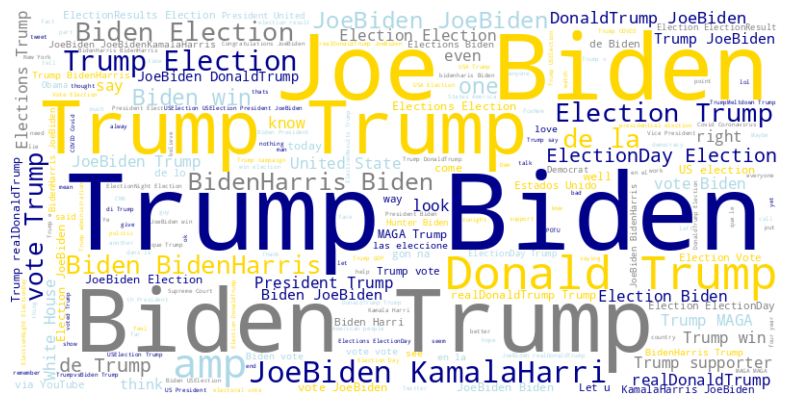

In [ ]:
# Generate word cloud
generate_wordcloud(all_text)

In [ ]:
# Apply complete preprocessing to each tweet
trump_biden_df['preprocessed_tweet'] = trump_biden_df['tweet'].apply(preprocess_tweets)

In [ ]:
trump_biden_df.tail()

,created_at,tweet_id,tweet,likes,retweet_count,user_id,user_name,user_join_date,user_followers_count,user_location,Candidate,preprocessed_tweet
1747798,2020-11-08 23:59:52,1.3255888813460152e+18,🌎\n\n“#congiuntifuoriregione”\n\n‘Sono felice ...,1.0,1.0,529331509.0,Angelo Tani,2012-03-19 12:07:06,5974.0,🌎,BIDEN,congiuntifuoriregion sono felic per jillbidenm...
1747799,2020-11-08 23:59:53,1.3255888855152271e+18,#AfD|ler reagieren panisch bis hysterisch auf ...,25.0,4.0,9.866107585731788e+17,watchdog,2018-04-18 14:21:49,3014.0,Saxony/GER,TRUMP,afdler reagieren panisch bi hysterisch auf die...
1747801,2020-11-08 23:59:55,1.3255888944825344e+18,OK just had to do it !\n#Trump #CatapultTrump ...,105.0,28.0,451979107.0,Dunken K Bliths,2012-01-01 08:04:29,12192.0,â Official Twitter Account,TRUMP,ok trump catapulttrump
1747802,2020-11-08 23:59:56,1.3255888982994534e+18,@nbcbayarea Who doesnât like dogs or any kin...,1.0,1.0,118263866.0,Dianna Maria,2010-02-28 03:31:22,1462.0,United States,TRUMP,nbcbayarea doesnt like dog kind anim anim love...
1747803,2020-11-08 23:59:57,1.3255889020323226e+18,#JoeBiden 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂 https://t.co/Ym...,0.0,0.0,114847946.0,Nataša,2010-02-16 20:10:35,33.0,Deutschland,BIDEN,joebiden


In [ ]:
trump_biden_df.shape

(1059986, 12)

In [ ]:
trump_biden_df.isnull().sum()

,0
created_at,0
tweet_id,0
tweet,0
likes,0
retweet_count,0
user_id,0
user_name,0
user_join_date,0
user_followers_count,0
user_location,0


In [ ]:
# Install necessary libraries
!pip install vaderSentiment
!pip install langdetect
!pip install textblob
!pip install swifter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=8c8f2b602f69a34b88cf06ed0486f4506a7b1f454987aa9a5e73e8628e4c1d3f
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 kB 13.9 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16506 sha256=babf66bdb258916e79dd3d0cfea51e27b72845087a7b3138a061ae9dbe768012
 

In [ ]:
# Import necessary libraries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from langdetect import detect, DetectorFactory
from textblob import TextBlob
from langdetect.lang_detect_exception import LangDetectException
import swifter

In [ ]:
# Set seed for reproducibility
DetectorFactory.seed = 0

In [ ]:
def preprocess_and_analyze_sentiment(trump_biden_df, text_column='tweet', positive_threshold=0.05, negative_threshold=-0.05):
    # Initialize VADER sentiment analyzer
    analyzer = SentimentIntensityAnalyzer()

    # Function to detect language
    def detect_language(text):
        try:
            return detect(text)
        except LangDetectException:
            return "unknown"

    # Function to get VADER sentiment for English text
    def get_vader_sentiment(text):
        sentiment_score = analyzer.polarity_scores(text)
        compound_score = sentiment_score['compound']
        if compound_score > positive_threshold:
            sentiment = 'positive'
        elif compound_score < negative_threshold:
            sentiment = 'negative'
        else:
            sentiment = 'neutral'
        return sentiment, sentiment_score

    # Function to get TextBlob sentiment for non-English text
    def get_textblob_sentiment(text):
        blob = TextBlob(text)
        sentiment_score = blob.sentiment.polarity
        if sentiment_score > positive_threshold:
            sentiment = 'positive'
        elif sentiment_score < negative_threshold:
            sentiment = 'negative'
        else:
            sentiment = 'neutral'
        return sentiment, {'polarity': sentiment_score, 'subjectivity': blob.sentiment.subjectivity}

    # Detect language and apply appropriate sentiment analysis
    def get_sentiment_label(row):
        language = row['language']
        text = row[text_column]
        if language == 'en':
            sentiment, sentiment_details = get_vader_sentiment(text)
        else:
            sentiment, sentiment_details = get_textblob_sentiment(text)
        return sentiment, sentiment_details

    # Detect language for each tweet
    trump_biden_df['language'] = trump_biden_df[text_column].swifter.apply(detect_language)

    # Apply sentiment analysis
    sentiment_results = trump_biden_df.swifter.apply(get_sentiment_label, axis=1)
    trump_biden_df['sentiment'] = sentiment_results.apply(lambda x: x[0])
    trump_biden_df['sentiment_details'] = sentiment_results.apply(lambda x: x[1])

    return trump_biden_df

In [ ]:
# Process the DataFrame
trump_biden_df = preprocess_and_analyze_sentiment(trump_biden_df)

Pandas Apply:   0%|          | 0/1059986 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1059986 [00:00<?, ?it/s]

In [ ]:
!mkdir /content/drive/MyDrive/preprocessed_datasets # creates the missing directory
trump_biden_df.to_csv('/content/drive/MyDrive/preprocessed_datasets/1_labelled_trump_biden_df.csv', encoding = 'utf-8', index = False)